## Measuring rotation in Psc-Eri

[Curtis et al. (2019)](https://arxiv.org/pdf/1905.10588.pdf) measured rotation for the Meingast et al. (2019) members o the Psc-Eri stellar stream, and found a clear co-eval structure in rotation-colour space.

Here, we will attempt to recover that same co-eval structure in the 101 stars targeted in that study, using `michael` only.

In [1]:
from michael import janet
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
cmap = sns.color_palette('colorblind', 8)

from jax import random
rng = random.PRNGKey(53)

from astroquery.vizier import Vizier
from astropy.coordinates import Angle
from astropy import units as u

import warnings
warnings.filterwarnings('ignore')

Hi there. Welcome to the good place.


In [2]:
cat = Vizier(catalog ='J/AJ/158/77/table2',
       columns = ['Source', 'RA_ICRS', 'DE_ICRS', 'GBP-GRP', 'Teff', 'Gmag','GMag', 'Prot'])
cat.ROW_LIMIT = -1
psceri_full = cat.get_catalogs(cat.catalog)[0]

In [41]:
from tqdm import tqdm

N = len(psceri_full)

df = pd.DataFrame(index = range(N), columns=['P', 'Perr', 'Pflag'])

for idx in tqdm(range(N)):
    psceri = psceri_full[idx]
    source = psceri['Source']

    ra_str = psceri['RA_ICRS'].split(' ')
    units_ra = ['h','m','s']
    rep = ''.join([ra_str[i]+units_ra[i] for i in range(3)])
    ra = Angle(rep).to(u.deg)

    dec_str = psceri['DE_ICRS'].split(' ')
    units_dec = ['d','m','s']
    rep = ''.join([dec_str[i]+units_dec[i] for i in range(3)])
    dec = Angle(rep).to(u.deg)

    j = janet(source, ra, dec,
              output_path = "/Users/oliver hall/Research/michael/Examples/PscEri",
              verbose = False)
    
    try:
        j.run(period_range = (psceri['Prot'].min()*0.5, 
                              psceri['Prot'].max()*1.5))
    except:
        continue
    
    df.loc[idx, 'P']= j.results.loc['best', 'overall']
    df.loc[idx, 'Perr']= j.results.loc['best', 'e_overall']
    df.loc[idx, 'Pflag']= j.results.loc['best', 'f_overall']
df['PC'] = np.array(psceri_full['Prot'].data)
df.to_csv('PscEri/PscEri_periods.csv')

  0%|                                                   | 0/101 [00:00<?, ?it/s]

No postcard object will be created for this target.


  0%|          | 0/292 [00:00<?, ?it/s]

  1%|▍                                          | 1/101 [00:02<03:29,  2.09s/it]

No postcard object will be created for this target.


  0%|          | 0/5201 [00:00<?, ?it/s]

  2%|▊                                          | 2/101 [00:09<08:44,  5.29s/it]

No postcard object will be created for this target.


  0%|          | 0/5518 [00:00<?, ?it/s]

  3%|█▎                                         | 3/101 [00:19<12:21,  7.57s/it]

No postcard object will be created for this target.


  0%|          | 0/273 [00:00<?, ?it/s]

  4%|█▋                                         | 4/101 [00:21<08:40,  5.37s/it]

No postcard object will be created for this target.


  0%|          | 0/4648 [00:00<?, ?it/s]

  5%|██▏                                        | 5/101 [00:31<11:15,  7.04s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/391 [00:00<?, ?it/s]

  6%|██▌                                        | 6/101 [00:35<09:05,  5.74s/it]

No postcard object will be created for this target.


  0%|          | 0/3637 [00:00<?, ?it/s]

  7%|██▉                                        | 7/101 [00:41<09:30,  6.06s/it]

No postcard object will be created for this target.


  0%|          | 0/89 [00:00<?, ?it/s]

  8%|███▍                                       | 8/101 [00:42<06:48,  4.39s/it]

No postcard object will be created for this target.


  0%|          | 0/168 [00:00<?, ?it/s]

  9%|███▊                                       | 9/101 [00:43<05:10,  3.38s/it]

No postcard object will be created for this target.


  0%|          | 0/157 [00:00<?, ?it/s]

 10%|████▏                                     | 10/101 [00:44<04:02,  2.66s/it]

No postcard object will be created for this target.


  0%|          | 0/78 [00:00<?, ?it/s]

 11%|████▌                                     | 11/101 [00:45<03:03,  2.04s/it]

No postcard object will be created for this target.


  0%|          | 0/3148 [00:00<?, ?it/s]

 12%|████▉                                     | 12/101 [00:52<05:12,  3.51s/it]

No postcard object will be created for this target.


  0%|          | 0/1930 [00:00<?, ?it/s]

 13%|█████▍                                    | 13/101 [00:57<05:44,  3.92s/it]

No postcard object will be created for this target.


  0%|          | 0/3508 [00:00<?, ?it/s]

 14%|█████▊                                    | 14/101 [01:03<06:51,  4.73s/it]

No postcard object will be created for this target.


  0%|          | 0/89 [00:00<?, ?it/s]

 15%|██████▏                                   | 15/101 [01:04<05:04,  3.54s/it]

No postcard object will be created for this target.


  0%|          | 0/1695 [00:00<?, ?it/s]

 16%|██████▋                                   | 16/101 [01:08<05:08,  3.63s/it]

No postcard object will be created for this target.


  0%|          | 0/49 [00:00<?, ?it/s]

 17%|███████                                   | 17/101 [01:08<03:45,  2.68s/it]

No postcard object will be created for this target.


  0%|          | 0/1774 [00:00<?, ?it/s]

 18%|███████▍                                  | 18/101 [01:12<04:08,  2.99s/it]

No postcard object will be created for this target.


  0%|          | 0/1783 [00:00<?, ?it/s]

 19%|███████▉                                  | 19/101 [01:16<04:25,  3.23s/it]

No postcard object will be created for this target.


  0%|          | 0/1593 [00:00<?, ?it/s]

 20%|████████▎                                 | 20/101 [01:20<04:33,  3.38s/it]

No postcard object will be created for this target.


  0%|          | 0/1901 [00:00<?, ?it/s]

 21%|████████▋                                 | 21/101 [01:24<04:49,  3.62s/it]

No postcard object will be created for this target.


  0%|          | 0/1455 [00:00<?, ?it/s]

 22%|█████████▏                                | 22/101 [01:27<04:39,  3.53s/it]

No postcard object will be created for this target.


  0%|          | 0/1509 [00:00<?, ?it/s]

 23%|█████████▌                                | 23/101 [01:30<04:30,  3.47s/it]

No postcard object will be created for this target.


  0%|          | 0/796 [00:00<?, ?it/s]

 24%|█████████▉                                | 24/101 [01:34<04:35,  3.58s/it]

Found star in Sector(s) 4 31


 25%|██████████▍                               | 25/101 [02:48<31:14, 24.66s/it]

No postcard object will be created for this target.


  0%|          | 0/39 [00:00<?, ?it/s]

 26%|██████████▊                               | 26/101 [02:49<21:43, 17.38s/it]

No postcard object will be created for this target.


  0%|          | 0/1053 [00:00<?, ?it/s]

 27%|███████████▏                              | 27/101 [02:51<15:54, 12.90s/it]

No postcard object will be created for this target.


  0%|          | 0/32 [00:00<?, ?it/s]

 28%|███████████▋                              | 28/101 [02:51<11:05,  9.12s/it]

No postcard object will be created for this target.


  0%|          | 0/851 [00:00<?, ?it/s]

 29%|████████████                              | 29/101 [02:53<08:27,  7.04s/it]

No postcard object will be created for this target.


  0%|          | 0/940 [00:00<?, ?it/s]

 30%|████████████▍                             | 30/101 [02:56<06:42,  5.66s/it]

No postcard object will be created for this target.


  0%|          | 0/889 [00:00<?, ?it/s]

 31%|████████████▉                             | 31/101 [02:58<05:29,  4.71s/it]

No postcard object will be created for this target.


  0%|          | 0/926 [00:00<?, ?it/s]

 32%|█████████████▎                            | 32/101 [03:01<04:36,  4.01s/it]

No postcard object will be created for this target.


  0%|          | 0/905 [00:00<?, ?it/s]

 33%|█████████████▋                            | 33/101 [03:03<04:02,  3.56s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/872 [00:00<?, ?it/s]

 34%|██████████████▏                           | 34/101 [03:07<03:52,  3.48s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/902 [00:00<?, ?it/s]

 35%|██████████████▌                           | 35/101 [03:10<03:51,  3.50s/it]

No postcard object will be created for this target.


  0%|          | 0/831 [00:00<?, ?it/s]

 36%|██████████████▉                           | 36/101 [03:12<03:22,  3.12s/it]

No postcard object will be created for this target.


  0%|          | 0/865 [00:00<?, ?it/s]

 37%|███████████████▍                          | 37/101 [03:15<03:06,  2.92s/it]

No postcard object will be created for this target.


  0%|          | 0/794 [00:00<?, ?it/s]

 38%|███████████████▊                          | 38/101 [03:20<03:37,  3.45s/it]

No postcard object will be created for this target.


  0%|          | 0/544 [00:00<?, ?it/s]

 39%|████████████████▏                         | 39/101 [03:22<03:12,  3.11s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/1199 [00:00<?, ?it/s]

 40%|████████████████▋                         | 40/101 [03:30<04:44,  4.66s/it]

No postcard object will be created for this target.


  0%|          | 0/788 [00:00<?, ?it/s]

 41%|█████████████████                         | 41/101 [03:33<04:00,  4.01s/it]

No postcard object will be created for this target.


  0%|          | 0/837 [00:00<?, ?it/s]

 42%|█████████████████▍                        | 42/101 [03:35<03:30,  3.57s/it]

No postcard object will be created for this target.


  0%|          | 0/771 [00:00<?, ?it/s]

 43%|█████████████████▉                        | 43/101 [03:38<03:09,  3.27s/it]

No postcard object will be created for this target.


  0%|          | 0/751 [00:00<?, ?it/s]

 44%|██████████████████▎                       | 44/101 [03:40<02:50,  3.00s/it]

No postcard object will be created for this target.


  0%|          | 0/8256 [00:00<?, ?it/s]

 45%|██████████████████▋                       | 45/101 [03:55<06:04,  6.52s/it]

No postcard object will be created for this target.


  0%|          | 0/3591 [00:00<?, ?it/s]

 46%|███████████████████▏                      | 46/101 [04:01<05:55,  6.46s/it]

No postcard object will be created for this target.


  0%|          | 0/22 [00:00<?, ?it/s]

 47%|███████████████████▌                      | 47/101 [04:01<04:09,  4.62s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/699 [00:00<?, ?it/s]

 48%|███████████████████▉                      | 48/101 [04:04<03:39,  4.14s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/371 [00:00<?, ?it/s]

 49%|████████████████████▍                     | 49/101 [04:07<03:02,  3.51s/it]

No postcard object will be created for this target.


  0%|          | 0/638 [00:00<?, ?it/s]

 50%|████████████████████▊                     | 50/101 [04:09<02:46,  3.26s/it]

No postcard object will be created for this target.


  0%|          | 0/664 [00:00<?, ?it/s]

 50%|█████████████████████▏                    | 51/101 [04:12<02:39,  3.19s/it]

No postcard object will be created for this target.


  0%|          | 0/680 [00:00<?, ?it/s]

 51%|█████████████████████▌                    | 52/101 [04:15<02:25,  2.97s/it]

No postcard object will be created for this target.


  0%|          | 0/650 [00:00<?, ?it/s]

 52%|██████████████████████                    | 53/101 [04:17<02:13,  2.79s/it]

No postcard object will be created for this target.


  0%|          | 0/717 [00:00<?, ?it/s]

 53%|██████████████████████▍                   | 54/101 [04:19<02:03,  2.63s/it]

No postcard object will be created for this target.


  0%|          | 0/22 [00:00<?, ?it/s]

 54%|██████████████████████▊                   | 55/101 [04:20<01:28,  1.93s/it]

No postcard object will be created for this target.


  0%|          | 0/68 [00:00<?, ?it/s]

 55%|███████████████████████▎                  | 56/101 [04:20<01:07,  1.51s/it]

No postcard object will be created for this target.


  0%|          | 0/21 [00:00<?, ?it/s]

 56%|███████████████████████▋                  | 57/101 [04:20<00:49,  1.14s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/639 [00:00<?, ?it/s]

 57%|████████████████████████                  | 58/101 [04:23<01:10,  1.63s/it]

No postcard object will be created for this target.


  0%|          | 0/1234 [00:00<?, ?it/s]

 58%|████████████████████████▌                 | 59/101 [04:28<01:54,  2.72s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/724 [00:00<?, ?it/s]

 59%|████████████████████████▉                 | 60/101 [04:33<02:14,  3.29s/it]

No postcard object will be created for this target.


  0%|          | 0/1029 [00:00<?, ?it/s]

 60%|█████████████████████████▎                | 61/101 [04:36<02:04,  3.11s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/597 [00:00<?, ?it/s]

 61%|█████████████████████████▊                | 62/101 [04:38<01:56,  2.99s/it]

No postcard object will be created for this target.


  0%|          | 0/1542 [00:00<?, ?it/s]

 62%|██████████████████████████▏               | 63/101 [04:42<02:05,  3.29s/it]

No postcard object will be created for this target.


  0%|          | 0/705 [00:00<?, ?it/s]

 63%|██████████████████████████▌               | 64/101 [04:45<01:48,  2.92s/it]

No postcard object will be created for this target.


  0%|          | 0/537 [00:00<?, ?it/s]

 64%|███████████████████████████               | 65/101 [04:46<01:32,  2.57s/it]

No postcard object will be created for this target.


  0%|          | 0/588 [00:00<?, ?it/s]

 65%|███████████████████████████▍              | 66/101 [04:48<01:23,  2.38s/it]

No postcard object will be created for this target.


  0%|          | 0/27 [00:00<?, ?it/s]

 66%|███████████████████████████▊              | 67/101 [04:48<00:59,  1.76s/it]

No postcard object will be created for this target.


  0%|          | 0/1061 [00:00<?, ?it/s]

 67%|████████████████████████████▎             | 68/101 [04:51<01:06,  2.01s/it]

No postcard object will be created for this target.


  0%|          | 0/503 [00:00<?, ?it/s]

 68%|████████████████████████████▋             | 69/101 [04:53<01:01,  1.91s/it]

No postcard object will be created for this target.


  0%|          | 0/720 [00:00<?, ?it/s]

 69%|█████████████████████████████             | 70/101 [04:55<01:01,  1.98s/it]

No postcard object will be created for this target.


  0%|          | 0/7298 [00:00<?, ?it/s]

 70%|█████████████████████████████▌            | 71/101 [05:06<02:21,  4.72s/it]

No postcard object will be created for this target.


  0%|          | 0/697 [00:00<?, ?it/s]

 71%|█████████████████████████████▉            | 72/101 [05:08<01:54,  3.96s/it]

No postcard object will be created for this target.


  0%|          | 0/776 [00:00<?, ?it/s]

 72%|██████████████████████████████▎           | 73/101 [05:10<01:35,  3.41s/it]

No postcard object will be created for this target.


  0%|          | 0/831 [00:00<?, ?it/s]

 73%|██████████████████████████████▊           | 74/101 [05:13<01:22,  3.06s/it]

No postcard object will be created for this target.


  0%|          | 0/2344 [00:00<?, ?it/s]

 74%|███████████████████████████████▏          | 75/101 [05:17<01:27,  3.38s/it]

No postcard object will be created for this target.


  0%|          | 0/546 [00:00<?, ?it/s]

 75%|███████████████████████████████▌          | 76/101 [05:19<01:13,  2.96s/it]

No postcard object will be created for this target.


  0%|          | 0/543 [00:00<?, ?it/s]

 76%|████████████████████████████████          | 77/101 [05:21<01:03,  2.63s/it]

No postcard object will be created for this target.


  0%|          | 0/15 [00:00<?, ?it/s]

 77%|████████████████████████████████▍         | 78/101 [05:21<00:44,  1.92s/it]

No postcard object will be created for this target.


  0%|          | 0/3469 [00:00<?, ?it/s]

 78%|████████████████████████████████▊         | 79/101 [05:27<01:09,  3.17s/it]

No postcard object will be created for this target.


  0%|          | 0/680 [00:00<?, ?it/s]

 79%|█████████████████████████████████▎        | 80/101 [05:29<01:00,  2.88s/it]

No postcard object will be created for this target.


  0%|          | 0/782 [00:00<?, ?it/s]

 80%|█████████████████████████████████▋        | 81/101 [05:32<00:55,  2.78s/it]

No postcard object will be created for this target.


  0%|          | 0/647 [00:00<?, ?it/s]

 81%|██████████████████████████████████        | 82/101 [05:34<00:49,  2.59s/it]

No postcard object will be created for this target.


  0%|          | 0/566 [00:00<?, ?it/s]

 82%|██████████████████████████████████▌       | 83/101 [05:36<00:42,  2.38s/it]

No postcard object will be created for this target.


  0%|          | 0/579 [00:00<?, ?it/s]

 83%|██████████████████████████████████▉       | 84/101 [05:38<00:37,  2.22s/it]

No postcard object will be created for this target.


  0%|          | 0/682 [00:00<?, ?it/s]

 84%|███████████████████████████████████▎      | 85/101 [05:40<00:34,  2.15s/it]

No postcard object will be created for this target.


  0%|          | 0/1135 [00:00<?, ?it/s]

 85%|███████████████████████████████████▊      | 86/101 [05:42<00:34,  2.31s/it]

No postcard object will be created for this target.


  0%|          | 0/871 [00:00<?, ?it/s]

 86%|████████████████████████████████████▏     | 87/101 [05:44<00:32,  2.29s/it]

No postcard object will be created for this target.


  0%|          | 0/10054 [00:00<?, ?it/s]

 87%|████████████████████████████████████▌     | 88/101 [06:00<01:21,  6.24s/it]

No postcard object will be created for this target.


  0%|          | 0/1006 [00:00<?, ?it/s]

 88%|█████████████████████████████████████     | 89/101 [06:02<01:00,  5.07s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/805 [00:00<?, ?it/s]

 89%|█████████████████████████████████████▍    | 90/101 [06:05<00:48,  4.44s/it]

No postcard object will be created for this target.


  0%|          | 0/763 [00:00<?, ?it/s]

 90%|█████████████████████████████████████▊    | 91/101 [06:07<00:37,  3.72s/it]

No postcard object will be created for this target.


  0%|          | 0/378 [00:00<?, ?it/s]

 91%|██████████████████████████████████████▎   | 92/101 [06:09<00:27,  3.07s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/600 [00:00<?, ?it/s]

 92%|██████████████████████████████████████▋   | 93/101 [06:11<00:22,  2.84s/it]

No postcard object will be created for this target.


  0%|          | 0/1996 [00:00<?, ?it/s]

 93%|███████████████████████████████████████   | 94/101 [06:15<00:21,  3.11s/it]

No postcard object will be created for this target.


  0%|          | 0/694 [00:00<?, ?it/s]

 94%|███████████████████████████████████████▌  | 95/101 [06:17<00:16,  2.75s/it]

No postcard object will be created for this target.


  0%|          | 0/660 [00:00<?, ?it/s]

 95%|███████████████████████████████████████▉  | 96/101 [06:19<00:12,  2.47s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/6654 [00:00<?, ?it/s]

 96%|████████████████████████████████████████▎ | 97/101 [06:34<00:25,  6.46s/it]

No postcard object will be created for this target.


  0%|          | 0/579 [00:00<?, ?it/s]

 97%|████████████████████████████████████████▊ | 98/101 [06:36<00:15,  5.11s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/1727 [00:00<?, ?it/s]

 98%|█████████████████████████████████████████▏| 99/101 [06:42<00:10,  5.18s/it]

No postcard object will be created for this target.


  0%|          | 0/828 [00:00<?, ?it/s]

 99%|████████████████████████████████████████▌| 100/101 [06:44<00:04,  4.26s/it]

No postcard object will be created for this target.
No postcard object will be created for this target.


  0%|          | 0/863 [00:00<?, ?it/s]

100%|█████████████████████████████████████████| 101/101 [06:49<00:00,  4.05s/it]


In [3]:
df = pd.read_csv('PscEri/PscEri_periods.csv', index_col=0)
df.head(5)

,P,Perr,Pflag,PC
0,0.432444,0.019395,129.0,0.52
1,0.834207,0.008747,129.0,0.87
2,0.836451,0.036538,129.0,0.82
3,0.573513,0.048196,2.0,0.56
4,0.944861,0.012928,129.0,0.94


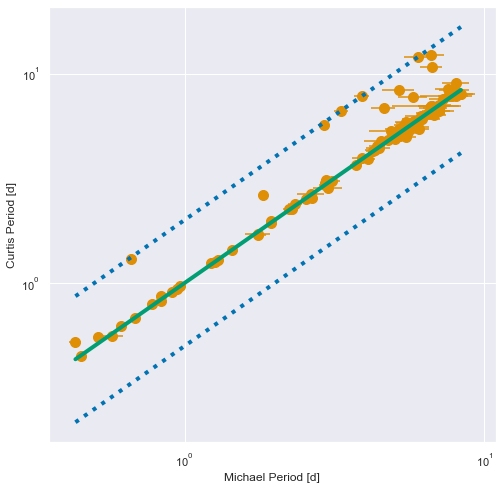

In [5]:
sns.set_style('darkgrid')
cmap = sns.color_palette('colorblind', 8)

s = df.Pflag <= 256

fig = plt.figure(figsize=(8,8))
plt.scatter(df.P[s], psceri_full['Prot'][s], s=100, c=cmap[1])
plt.errorbar(df.P[s], psceri_full['Prot'][s], xerr=df.Perr[s], fmt='|', zorder=0, c=cmap[1])

x = np.linspace(df.P.min(), df.P.max())
plt.plot(x, 2*x, ls=':', lw=4, c=cmap[0])
plt.plot(x, 0.5*x, ls=':', lw=4, c= cmap[0])
plt.plot(x, x, lw=4, c=cmap[2])

plt.xlabel('Michael Period [d]')
plt.ylabel('Curtis Period [d]')
plt.yscale('log')
plt.xscale('log')

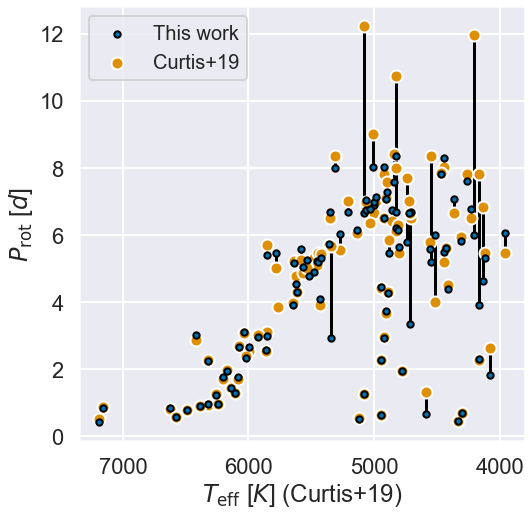

In [6]:
sns.set_context('poster')
cmap = sns.color_palette('colorblind', 8)
fig = plt.figure(figsize=(8,8))
plt.scatter(psceri_full['Teff'], df.P, zorder=3, s=40, c=cmap[0], ec='k',
           label = 'This work')
plt.scatter(psceri_full['Teff'], psceri_full['Prot'], zorder=2, ec='w', c=cmap[1],
           label = 'Curtis+19')
for idx in range(len(df)):
    plt.vlines(psceri_full[idx]['Teff'], 
                ymin = np.min([df.loc[idx, 'P'], psceri_full[idx]['Prot']]),
                ymax = np.max([df.loc[idx, 'P'], psceri_full[idx]['Prot']]),
                color= 'k', zorder=1)
plt.gca().invert_xaxis()
plt.legend(loc='upper left', fontsize=20)
plt.xlabel(r'$T_{\rm eff}$ [$K$] (Curtis+19)')
plt.ylabel(r'$P_{\rm rot}$ [$d$]')
plt.grid(zorder=0)


In [8]:
s = np.abs(df.P.values - psceri_full['Prot']) < df.Perr.values

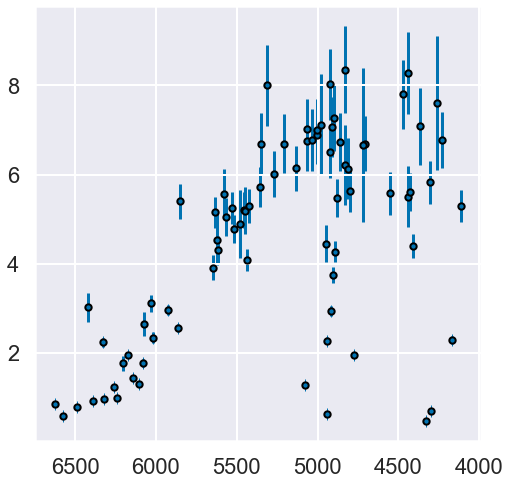

In [12]:
fig = plt.figure(figsize=(8,8))
plt.scatter(psceri_full[s]['Teff'], df[s]['P'], zorder=3, s=40, c=cmap[0], ec='k',
           label = 'This work')
plt.errorbar(psceri_full[s]['Teff'], df[s]['P'], zorder=0, fmt='|',
           yerr = df[s]['Perr'])
plt.gca().invert_xaxis()

Which stars do ont fall within 1 sigma of the curtis targets?

In [27]:
s = np.abs(df.P.values - psceri_full['Prot']) < 1*df.Perr.values
dfs = df[~s].reset_index()

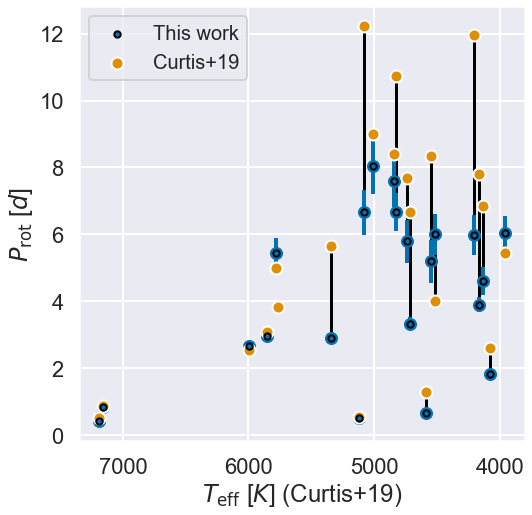

In [38]:
sns.set_context('poster')
cmap = sns.color_palette('colorblind', 8)
fig = plt.figure(figsize=(8,8))
plt.scatter(psceri_full[~s]['Teff'], dfs.P, zorder=4, s=40, c=cmap[0], ec='k',
           label = 'This work')
plt.scatter(psceri_full[~s]['Teff'], psceri_full[~s]['Prot'], zorder=3, ec='w', c=cmap[1],
           label = 'Curtis+19')
plt.errorbar(psceri_full[~s]['Teff'], dfs.P, yerr=dfs.Perr, fmt='o', barsabove=True, 
             elinewidth=4, zorder=2)
for idx in range(len(df[~s])):
    plt.vlines(psceri_full[~s][idx]['Teff'], 
                ymin = np.min([dfs.loc[idx, 'P'], psceri_full[~s][idx]['Prot']]),
                ymax = np.max([dfs.loc[idx, 'P'], psceri_full[~s][idx]['Prot']]),
                color= 'k', zorder=1)
plt.gca().invert_xaxis()
plt.legend(loc='upper left', fontsize=20)
plt.xlabel(r'$T_{\rm eff}$ [$K$] (Curtis+19)')
plt.ylabel(r'$P_{\rm rot}$ [$d$]')
plt.grid(zorder=0)


In [39]:
dfs

,index,P,Perr,Pflag,PC
0,0,0.432444,0.019395,129.0,0.52
1,1,0.834207,0.008747,129.0,0.87
2,17,2.666641,0.089824,129.0,2.55
3,21,2.969703,0.124928,129.0,3.10
4,24,NaN,NaN,NaN,3.84
5,32,5.460309,0.441696,129.0,5.00
6,42,2.910773,0.124394,129.0,5.66
7,44,0.514440,0.003555,129.0,0.55
8,48,6.663181,0.666318,129.0,12.22
9,64,7.583144,0.759776,145.0,8.40


In [46]:
psceri_full[~s].to_pandas().to_csv('psceri_disagreement.csv')

In [49]:
psceri_full[~s].to_pandas()

,Source,RA_ICRS,DE_ICRS,GBP-GRP,Teff,Gmag,GMag,Prot
0,3198972700981234048,04 22 31.5,-07 33 03.2,0.432,7187,8.903,2.802,0.52
1,5181474045115843072,03 10 47.3,-06 34 29.8,0.446,7161,8.562,2.954,0.87
2,5104477754084350464,03 15 18.8,-17 56 36.4,0.731,5993,9.606,4.279,2.55
3,2346216668164370432,00 54 13.5,-22 53 07.8,0.764,5852,9.441,4.452,3.10
4,2493286445846897664,02 15 46.4,-02 36 32.5,0.821,5761,9.916,4.813,3.84
5,2495781619982992640,02 45 01.2,-02 25 46.3,0.921,5782,10.780,5.304,5.00
6,3245140743257978496,03 54 01.0,-06 14 14.6,1.017,5344,11.146,5.434,5.66
7,3185678437170300800,04 34 42.8,-08 57 18.5,1.052,5122,11.899,5.796,0.55
8,5083255496041631616,03 57 35.1,-24 28 42.1,1.077,5078,11.131,5.885,12.22
9,2484875735945832704,01 24 24.7,-03 16 39.0,1.222,4842,11.791,6.398,8.40
